In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/ankushpanday1/usa-statewise-daily-temperature-december-2024")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rifqiapriansyah
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/ankushpanday1/usa-statewise-daily-temperature-december-2024


100%|██████████| 5.95k/5.95k [00:00<00:00, 3.01MB/s]

In [3]:
import pandas as pd
data = pd.read_csv("/content/usa-statewise-daily-temperature-december-2024/december_temperature_usa_2024_pivoted.csv")

In [4]:
data.head()

,State,Average_Temperature_Min_F_2024-12-01,Average_Temperature_Min_F_2024-12-02,Average_Temperature_Min_F_2024-12-03,Average_Temperature_Min_F_2024-12-04,Average_Temperature_Min_F_2024-12-05,Average_Temperature_Min_F_2024-12-06,Average_Temperature_Min_F_2024-12-07,Average_Temperature_Min_F_2024-12-08,Average_Temperature_Min_F_2024-12-09,...,Average_Temperature_Max_F_2024-12-22,Average_Temperature_Max_F_2024-12-23,Average_Temperature_Max_F_2024-12-24,Average_Temperature_Max_F_2024-12-25,Average_Temperature_Max_F_2024-12-26,Average_Temperature_Max_F_2024-12-27,Average_Temperature_Max_F_2024-12-28,Average_Temperature_Max_F_2024-12-29,Average_Temperature_Max_F_2024-12-30,Average_Temperature_Max_F_2024-12-31
0,Alabama,35.2,34.0,33.6,34.9,33.8,36.4,37.6,33.3,34.1,...,52.6,54.7,53.4,57.4,53.9,54.6,56.2,53.7,52.7,57.6
1,Alaska,10.9,11.8,8.4,7.0,9.7,10.2,8.7,9.7,8.8,...,21.1,19.5,21.8,21.4,21.6,19.6,20.0,21.5,18.9,20.5
2,Arizona,42.5,43.2,45.7,44.2,44.9,42.7,45.9,43.9,44.6,...,67.7,66.5,67.0,63.5,64.9,63.5,66.7,65.0,67.2,66.3
3,Arkansas,30.2,32.1,30.3,30.8,29.3,32.3,33.1,30.9,34.3,...,53.7,51.8,52.6,54.0,53.4,53.6,49.4,50.7,51.2,54.9
4,California,44.7,47.8,45.3,42.6,46.8,47.2,45.6,47.0,44.5,...,65.7,62.4,66.7,66.5,64.6,62.2,64.9,65.7,62.5,63.5


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 63 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   State                                 50 non-null     object 
 1   Average_Temperature_Min_F_2024-12-01  50 non-null     float64
 2   Average_Temperature_Min_F_2024-12-02  50 non-null     float64
 3   Average_Temperature_Min_F_2024-12-03  50 non-null     float64
 4   Average_Temperature_Min_F_2024-12-04  50 non-null     float64
 5   Average_Temperature_Min_F_2024-12-05  50 non-null     float64
 6   Average_Temperature_Min_F_2024-12-06  50 non-null     float64
 7   Average_Temperature_Min_F_2024-12-07  50 non-null     float64
 8   Average_Temperature_Min_F_2024-12-08  50 non-null     float64
 9   Average_Temperature_Min_F_2024-12-09  50 non-null     float64
 10  Average_Temperature_Min_F_2024-12-10  50 non-null     float64
 11  Average_Temperature_M

In [6]:
print(data.isnull().sum().sum())

0


In [15]:
import pandas as pd

# Ubah format dari wide format ke long format
data_melted = data.melt(id_vars=["State"], var_name="Date", value_name="Temperature")

# Lihat hasil perubahan format
data_melted.head()


,State,Date,Temperature
0,Alabama,Average_Temperature_Min_F_2024-12-01,35.2
1,Alaska,Average_Temperature_Min_F_2024-12-01,10.9
2,Arizona,Average_Temperature_Min_F_2024-12-01,42.5
3,Arkansas,Average_Temperature_Min_F_2024-12-01,30.2
4,California,Average_Temperature_Min_F_2024-12-01,44.7


In [16]:
data_melted = data.melt(id_vars=["State"], var_name="Date", value_name="Temperature")


In [18]:
data_melted["Date"] = data_melted["Date"].str.replace(r"Average_Temperature_(Min|Max)_F_", "", regex=True)


In [19]:
data_melted["Date"] = pd.to_datetime(data_melted["Date"])


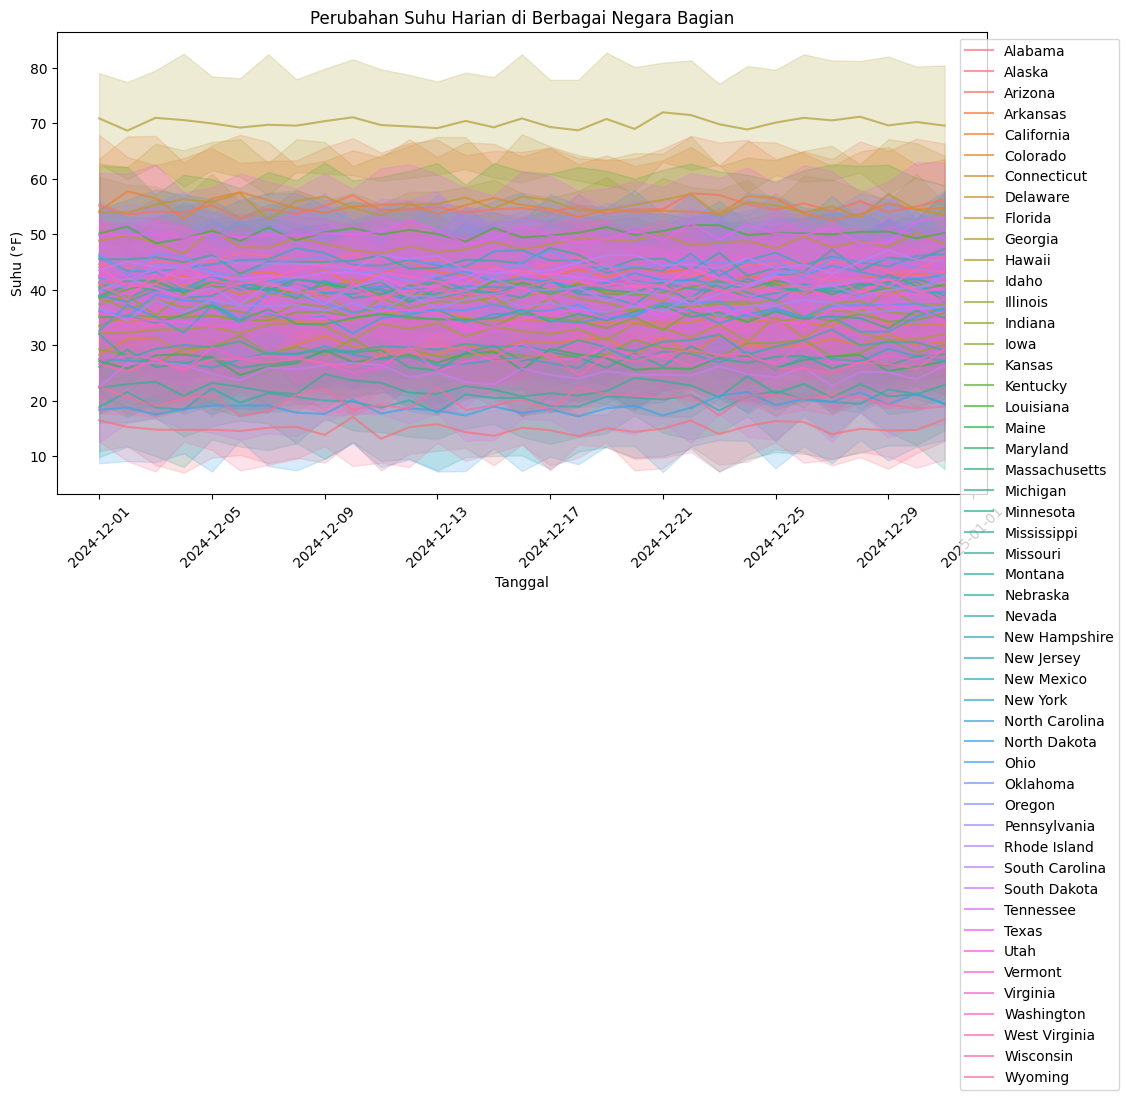

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=data_melted, x="Date", y="Temperature", hue="State", alpha=0.7)
plt.xlabel("Tanggal")
plt.ylabel("Suhu (°F)")
plt.title("Perubahan Suhu Harian di Berbagai Negara Bagian")
plt.xticks(rotation=45)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()


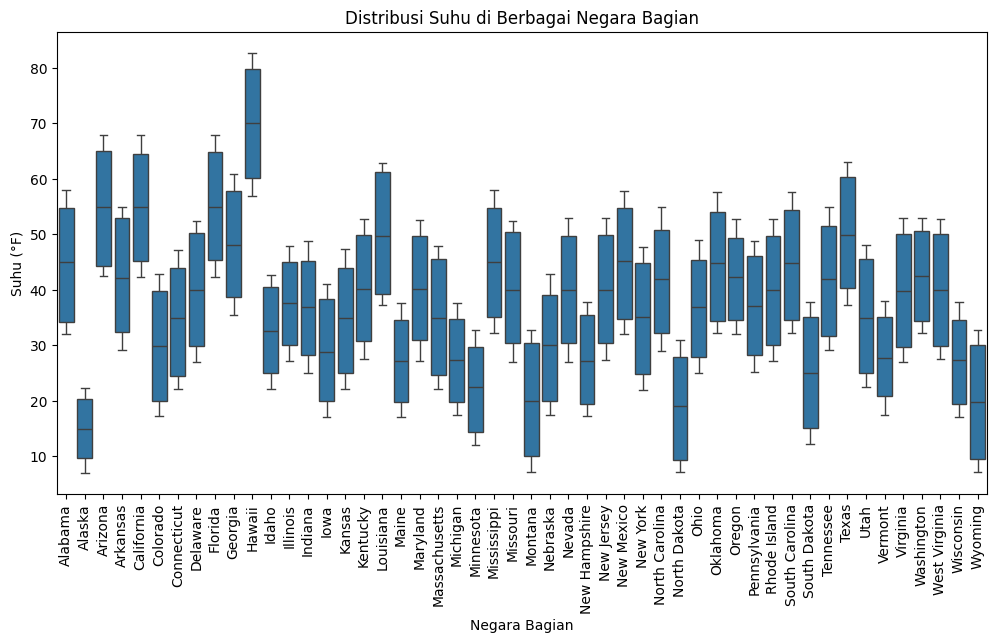

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_melted, x="State", y="Temperature")
plt.xlabel("Negara Bagian")
plt.ylabel("Suhu (°F)")
plt.title("Distribusi Suhu di Berbagai Negara Bagian")
plt.xticks(rotation=90)
plt.show()


In [23]:
print(data_melted.duplicated(subset=["State", "Date"]).sum())


1550


In [24]:
data_melted = data_melted.drop_duplicates(subset=["State", "Date"])


In [25]:
data_melted = data_melted.groupby(["State", "Date"], as_index=False)["Temperature"].mean()


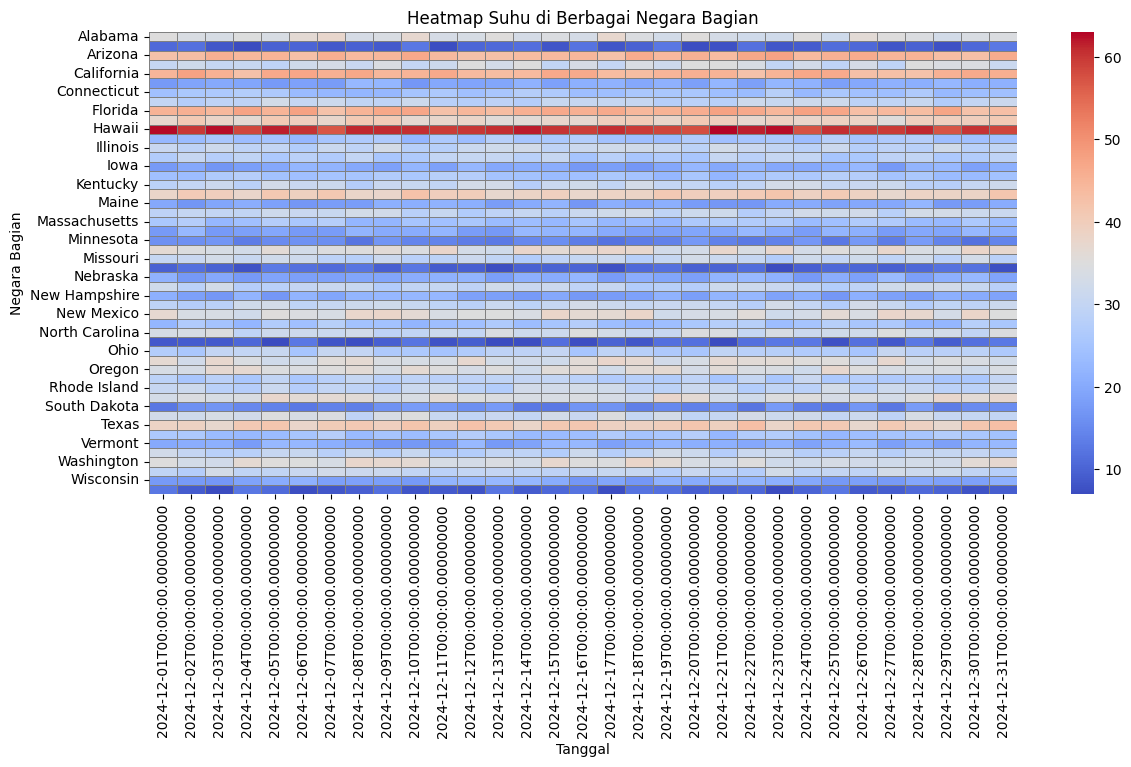

In [26]:
pivot_table = data_melted.pivot(index="State", columns="Date", values="Temperature")

plt.figure(figsize=(14, 6))
sns.heatmap(pivot_table, cmap="coolwarm", linewidths=0.5, linecolor="gray")
plt.xlabel("Tanggal")
plt.ylabel("Negara Bagian")
plt.title("Heatmap Suhu di Berbagai Negara Bagian")
plt.show()

In [27]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Dari insight yang sudah saya dapatkan, bahwa heatmap yang dihasilkan sangat terlihat jelas pada negara bagian amerika :

Negara bagian yang memiliki warna cenderung lebih terang seperti California dann FLorida adalah negara dengan suhu lebih tinggi

Jika di bandingkan dengan negara bagian utara yang cenderung dalam grafik berwarna lebih gelap, negara tersebut cendurung ebrada pada suhu lebih rendah. Contohnya ada pada Alaska dan negara bagian utara.

Pencapaian harian yang stabil, meskipun pola perubahan suhu harian, pola tersebut menunjukkan bahwa suhu tidak mengalami perubahan yang ekstrim dalam periode waktu yang ditampilkan pada grafik.

Suhu yang juga padat atau tetap 🇰
sebagian besar negara bagian memiliki suhu yang kisarannya berada pada 20 derajat farenheit - 70 farenheit
